In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claimsDF = pd.read_csv('C:/Users/Advance Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv')
customerDF = pd.read_csv('C:/Users/Advance Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [4]:
claimsDF.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
claimsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null object
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 86.0+ KB


In [7]:
claimsDF['claim_date'] = pd.to_datetime(claimsDF['claim_date'])

In [8]:
claimsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null datetime64[ns]
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 86.0+ KB


In [5]:
customerDF.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
customerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
CUST_ID        1085 non-null int64
gender         1085 non-null object
DateOfBirth    1085 non-null object
State          1085 non-null object
Contact        1085 non-null object
Segment        1085 non-null object
dtypes: int64(1), object(5)
memory usage: 50.9+ KB


In [9]:
customerDF['DateOfBirth'] = pd.to_datetime(customerDF['DateOfBirth'])

In [10]:
customerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
CUST_ID        1085 non-null int64
gender         1085 non-null object
DateOfBirth    1085 non-null datetime64[ns]
State          1085 non-null object
Contact        1085 non-null object
Segment        1085 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 50.9+ KB


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [7]:
claimsDF['claim_amount'] = pd.to_numeric(claimsDF['claim_amount'].str.replace('$',''))

In [8]:
claimsDF['claim_amount'].head()

0    2980.0
1    2980.0
2    3369.5
3    1680.0
4    2680.0
Name: claim_amount, dtype: float64

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [9]:
claimsDF['alert_flag'] = np.where((claimsDF['claim_type'] == 'Injury only') & (claimsDF['police_report'] == 'No') , 1 , 0)

# 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [10]:
uniqueClaimsDF  = claimsDF.drop_duplicates(subset = 'customer_id')

# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [289]:
customerClaimMergedDF = customerDF.merge(claimsDF, how = 'left', left_on = 'CUST_ID', right_on = 'customer_id', suffixes=('_cs','_clm'))

In [296]:
customerClaimMergedDF.isna().values.any()

True

In [297]:
customerClaimMergedDF.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

In [14]:
customerClaimMergedDF[uniqueClaimsDF.columns.difference(['claim_date'])].head()

,alert_flag,claim_amount,claim_area,claim_id,claim_type,customer_id,fraudulent,incident_cause,police_report,total_policy_claims
0,0,2980.0,Auto,54004764,Material only,21868593,No,Driver error,No,1.0
1,0,2980.0,Home,33985796,Material only,75740424,No,Crime,Unknown,3.0
2,0,3369.5,Auto,53522022,Material only,30308357,Yes,Other driver error,No,1.0
3,0,1680.0,Auto,13015401,Material only,47830476,No,Natural causes,No,1.0
4,0,2680.0,Auto,22890252,Material only,19269962,No,Crime,No,1.0


In [301]:
customerClaimMergedDF[["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent"]].mode()

,gender,State,Segment,incident_cause,claim_area,claim_type,fraudulent
0,Male,NY,Gold,Other causes,Auto,Material only,No


In [302]:
customerClaimMergedDF[["claim_amount",'total_policy_claims']].mean().round(2)

total_policy_claims    1.59
dtype: float64

In [303]:
customerClaimMergedDF.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

In [304]:
customerClaimMergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
CUST_ID                1092 non-null int64
gender                 1092 non-null object
DateOfBirth            1092 non-null object
State                  1092 non-null object
Contact                1092 non-null object
Segment                1092 non-null object
claim_id               1085 non-null float64
customer_id            1085 non-null float64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
dtypes: float64(3), int64(1), object(12)
memory usage: 145.0+ KB


In [305]:
customerClaimMergedDF[['claim_id','customer_id','claim_amount','total_policy_claims']].fillna(uniqueClaimsDF.mean().round(2) , inplace = True)

In [308]:
customerClaimMergedDF.select_dtypes(include=['int64','float64']).fillna(customerClaimMergedDF.mean().round(2) , inplace = True)

In [312]:
customerClaimMergedDF[["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent"]].fillna(customerClaimMergedDF.mode().round(2) , inplace = True)

In [318]:
customerClaimMergedDF.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
dtype: int64

##### 7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [30]:
from datetime import date
import math
today = date.today()
totalDays = 365.24
def getAgeFromDOB(dob):
    ageInDays =  pd.to_datetime(date.today()) - pd.to_datetime(dob)
    age = math.ceil(ageInDays.days/totalDays)
    return age

In [31]:
customerDF['DOB'] = np.where((pd.to_datetime(customerDF['DateOfBirth']).dt.year > 1999) & (pd.to_datetime(customerDF['DateOfBirth']).dt.year <= 2069), pd.to_datetime(customerDF['DateOfBirth']) + pd.DateOffset(years=-100),pd.to_datetime(customerDF['DateOfBirth']))

In [32]:
customerDF['Age'] = customerDF['DOB'].apply(getAgeFromDOB)

In [33]:
customerDF[customerDF['Age'] < 0]

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB,Age


In [34]:
bins = [0,18,30,60,np.inf]
values2 =['< 18','18-30','30-60','60+']
values =['Children','Youth','Adult','Senior']
customerDF['Category'] = pd.cut(customerDF['Age'],bins,labels=values)

In [35]:
customerDF[['CUST_ID','DateOfBirth','Age','Category']].head()

,CUST_ID,DateOfBirth,Age,Category
0,21868593,12-Jan-79,42,Adult
1,75740424,13-Jan-70,51,Adult
2,30308357,11-Mar-84,37,Adult
3,47830476,01-May-86,35,Adult
4,19269962,13-May-77,44,Adult


# 8. What is the average amount claimed by the customers from various segments?

In [39]:
customerClaimMergedDF.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12852.189802
1,Platinum,12336.517291
2,Silver,12185.751562


# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [40]:
claimDate = '2018-10-01'
claimsDF['claim_date'] = pd.to_datetime(claimsDF['claim_date']) 

In [41]:
claimsDF[claimDate <=  claimsDF['claim_date'] + pd.DateOffset(days = -20)].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 20690.0
Driver error          83750.0
Natural causes         7585.0
Other causes          89177.5
Other driver error    19610.0
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [42]:
customerClaimMergedDF[(customerClaimMergedDF['State'].isin(['TX','DE','AK'])) & (customerClaimMergedDF['incident_cause'].isin(['Driver error','Other driver error']))]['CUST_ID'].count()

36

In [154]:
customerClaimMergedDF[(customerClaimMergedDF['State'].isin(['TX','DE','AK'])) & (customerClaimMergedDF['incident_cause'].isin(['Driver error','Other driver error']))].shape[0]

36

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [184]:
csClaimPieDF = customerClaimMergedDF.groupby(['gender','Segment']).aggregate({'claim_amount' : 'sum'})
csClaimPieDF = csClaimPieDF.round(2)
csClaimPieDF = csClaimPieDF.stack()
csClaimPieDF = csClaimPieDF.unstack(level = 1)
csClaimPieDF

,Segment,Gold,Platinum,Silver
gender,,,,
Female,claim_amount,1997529.0,2282210.0,1739832.0
Male,claim_amount,2539294.0,1998561.5,2159608.5


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000196BD165630>,
      dtype=object)

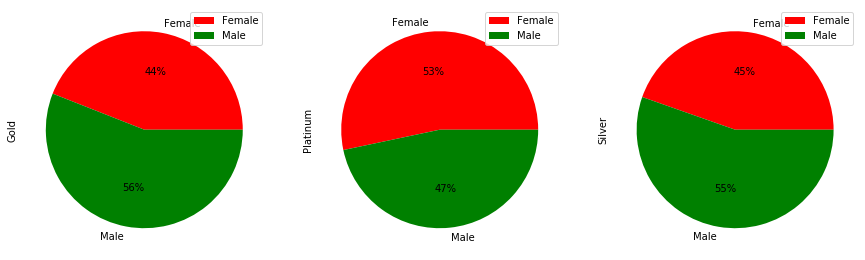

In [183]:
csClaimPieDF.plot(kind='pie', 
            labels=['Female','Male'], 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true',
            figsize=(15,8))

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [202]:
driverRelatedIssuesDF = customerClaimMergedDF[customerClaimMergedDF['incident_cause'].isin(['Driver error','Other driver error'])].groupby('gender')['claim_amount'].sum()
driverRelatedIssuesDF

gender
Female    2977565.0
Male      3805699.0
Name: claim_amount, dtype: float64

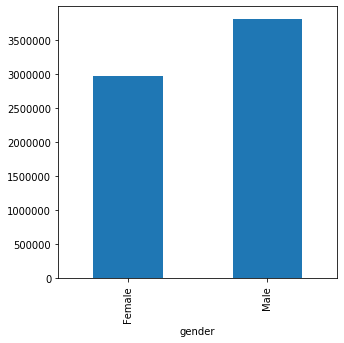

In [201]:
driverRelatedIssuesGraph=driverRelatedIssuesDF.plot.bar(figsize=(5,5))

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [217]:
fraudulentPolicyClaimsDF = customerClaimMergedDF.groupby(['Category'])['fraudulent'].count()
#customerClaimMergedDF.groupby(['Category','fraudulent'])['customer_id'].count()
fraudulentPolicyClaimsDF

Category
Children      0
Youth       263
Adult       803
Senior       19
Name: fraudulent, dtype: int64

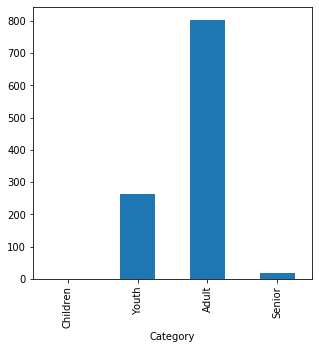

In [218]:
fraudulentPolicyClaimsDF.plot.bar(figsize=(5,5))

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [220]:
customerClaimMergedDF['claim_date'] = pd.to_datetime(customerClaimMergedDF['claim_date'])

In [221]:
customerClaimMergedDF['claim_monthYear'] = customerClaimMergedDF['claim_date'].dt.to_period('M')

In [222]:
claimMonthlyChronologicalWise = customerClaimMergedDF.groupby('claim_monthYear')['claim_amount'].sum()

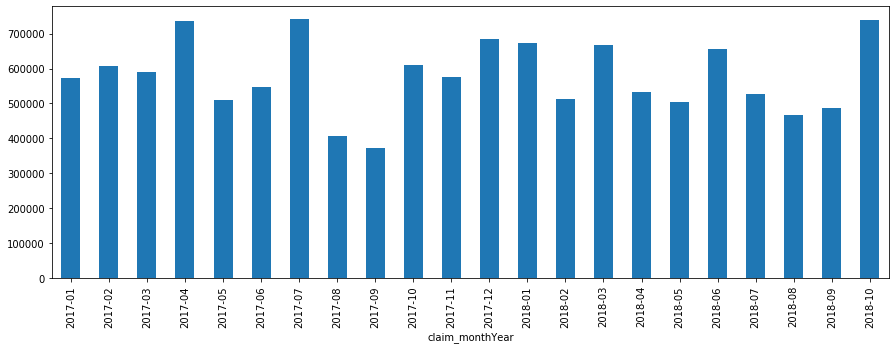

In [223]:
import matplotlib.pyplot as plt
claimMonthlyChronologicalWise.T.plot(kind='bar',figsize = (15,5))
plt.show()

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [79]:
factedClaimDF = customerClaimMergedDF.groupby(['gender','Category','fraudulent'])['claim_amount'].mean().reset_index()

In [89]:
factedClaimDF = factedClaimDF.round(2)
factedClaimDF

,gender,Category,fraudulent,claim_amount
0,Female,Youth,No,13031.52
1,Female,Youth,Yes,8650.74
2,Female,Adult,No,12038.10
3,Female,Adult,Yes,11850.69
4,Female,Senior,No,40180.00
5,Female,Senior,Yes,2593.25
6,Male,Youth,No,12016.70
7,Male,Youth,Yes,11471.89
8,Male,Adult,No,12382.24
9,Male,Adult,Yes,16291.44


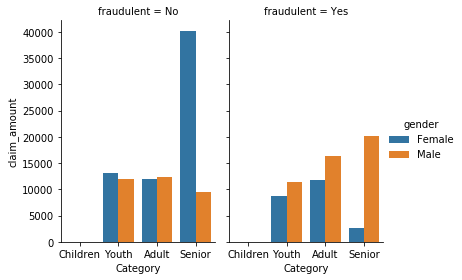

In [90]:
sns.catplot(x="Category", y="claim_amount",
                hue="gender", col="fraudulent",
                data=factedClaimDF, kind="bar",
                height=4, aspect=.7);

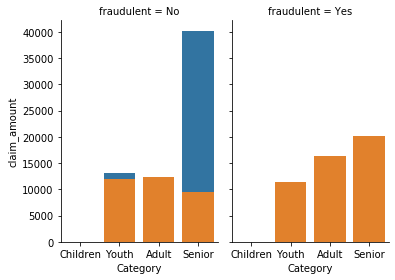

In [113]:
g = sns.FacetGrid(factedClaimDF,col="fraudulent", hue="gender", height=4, aspect = 0.7)
g.map(sns.barplot, "Category", "claim_amount")

#  16. Is there any similarity in the amount claimed by males and females?

In [244]:
#correlation
s1 = customerClaimMergedDF.loc[ customerClaimMergedDF.gender == 'Female', 'claim_amount']
s2 = customerClaimMergedDF.loc[ customerClaimMergedDF.gender == 'Male', 'claim_amount']

In [247]:
print( 'mean s1:', round(s1.mean(), 2), 
          '| mean s2:', round(s2.mean(), 2))

mean s1: 12033.19 | mean s2: 12855.76


In [249]:
print( 'var s1:', round(s1.var(), 2), 
          '| var s2:', round(s2.var(), 2))

var s1: 182423825.73 | var s2: 196541137.35


Ho: No variance in the spend of different gender Ha: Customers of different gender spend differently

CI: 95%, P-Value: 0.05

Test: ANOVA/f-test

In [250]:
stats.f_oneway(s1, s2)

F_onewayResult(statistic=0.901453714378342, pvalue=0.3426195654901364)

# 17. Is there any relationship between age category and segment?

Ho: No relationship | Both are independent
Ha: Dependent | have relationship
    
CI: 99%, p: 0.01
        
Test: chisquare

In [257]:
obs = pd.crosstab( customerClaimMergedDF.Category, customerClaimMergedDF.Segment )
stats.chi2_contingency( obs )

(3.2217083393274493,
 0.521431829148047,
 4,
 array([[ 83.0603363 ,  82.58160237,  76.35806133],
        [258.44807122, 256.95845697, 237.59347181],
        [  5.49159248,   5.45994065,   5.04846686]]))

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [ ]:
customerClaimMergedDF['claim_date']

In [135]:
customerClaimMergedDF['claim_date'] = pd.to_datetime(customerClaimMergedDF['claim_date'])

In [138]:
customerClaimMergedDF['claim_date'].dt.year.head()

0    2017
1    2018
2    2018
3    2018
4    2018
Name: claim_date, dtype: int64

In [204]:
customerClaimMergedDF.groupby(customerClaimMergedDF['claim_date'].dt.year)['claim_amount'].mean().round(2)

claim_date
2017    12264.46
2018    12689.04
Name: claim_amount, dtype: float64

# 19. Is there any difference between age groups and insurance claims?

In [258]:
customerClaimMergedDF.Category.unique()

[Adult, Youth, Senior]
Categories (3, object): [Youth < Adult < Senior]

In [264]:
s1 = customerClaimMergedDF.loc[ customerClaimMergedDF.Category == 'Adult', 'total_policy_claims']
s2 = customerClaimMergedDF.loc[ customerClaimMergedDF.Category == 'Youth', 'total_policy_claims']
s3 = customerClaimMergedDF.loc[ customerClaimMergedDF.Category == 'Senior', 'total_policy_claims']

In [265]:
print( 'mean s1:', round(s1.mean(), 2), 
          '| mean s2:', round(s2.mean(), 2), 
              '| mean s3:', round(s3.mean(), 2))

mean s1: 1.56 | mean s2: 1.66 | mean s3: 1.75


In [266]:
print( 'var s1:', round(s1.var(), 2), 
          '| var s2:', round(s2.var(), 2), 
              '| var s3:', round(s3.var(), 2))

var s1: 1.18 | var s2: 1.7 | var s3: 1.93


In [267]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=0.8284316776826716, pvalue=0.4370308153832716)

# 20. Is there any relationship between total number of policy claims and the claimed amount?

Ho: No relationship
Ha: Dependent or have relationship
    
CI: 95%, p-value: 0.05

Test: Pearson Cofficient


In [271]:
customerClaimMergedDF.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB,Age,Category,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,1979-01-12,42,Adult,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,1970-01-13,51,Adult,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0.0


In [272]:
stats.pearsonr( customerClaimMergedDF.total_policy_claims, customerClaimMergedDF.claim_amount )

(-0.018086586789599377, 0.565683114863196)

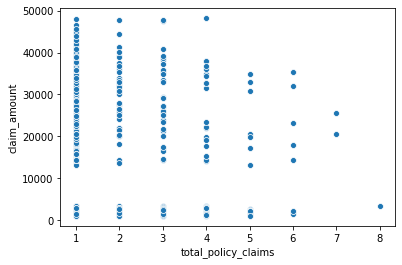

In [274]:
sns.scatterplot( customerClaimMergedDF.total_policy_claims, customerClaimMergedDF.claim_amount )
plt.show()